# Import Classes 

In [26]:
import Pytorch3DObjectGenerator

import os
import numpy as np
import torch
import matplotlib.pyplot as plt

# io utils
from pytorch3d.io import load_obj

# datastructures
from pytorch3d.structures import Meshes, Textures

# 3D transformations functions
from pytorch3d.transforms import Rotate, Translate

# rendering components
from pytorch3d.renderer import (
    OpenGLPerspectiveCameras, look_at_view_transform, look_at_rotation, 
    RasterizationSettings, MeshRenderer, MeshRasterizer, BlendParams,
    SoftSilhouetteShader, HardPhongShader, PointLights
)

from pytorch3d.utils import ico_sphere


# Import Mesh Files

In [6]:
verts, faces_idx, _ = load_obj("/Users/jgornet/Documents/Projects/Meshes/sphere.obj")
faces = faces_idx.verts_idx

verts_rgb = torch.ones_like(verts)[None]  # (1, V, 3)
textures = Textures(verts_rgb=verts_rgb)

sphere_mesh = Meshes(
    verts=[verts],   
    faces=[faces], 
    textures=textures
)

In [7]:
verts, faces_idx, _ = load_obj("/Users/jgornet/Documents/Projects/Meshes/cube.obj")
faces = faces_idx.verts_idx

verts_rgb = torch.ones_like(verts)[None]  # (1, V, 3)
textures = Textures(verts_rgb=verts_rgb)

cube_mesh = Meshes(
    verts=[verts],   
    faces=[faces], 
    textures=textures
)

# Create Renderer to convert mesh to textured object

In [9]:
image_size      = 128
faces_per_pixel = 1
lights_location = (2.0,1.0,-2.0)

created_renderer = Pytorch3DObjectGenerator.createRenderer(image_size,faces_per_pixel,lights_location)

In [11]:
sphere_converter = Pytorch3DObjectGenerator.ConvertMesh(sphere_mesh,created_renderer,initial_camera_position=np.array([3.0,50.0,0.0]))
cube_converter   = Pytorch3DObjectGenerator.ConvertMesh(cube_mesh,created_renderer,initial_camera_position=np.array([3.0,50.0,0.0]))


# Take a Picture of the object at a specific angle

In [27]:
sphere_converter.set_camera_position(np.array([3.0,25.0,0.0])) # distance, elevation, azimuth
cube_converter.set_camera_position(np.array([5.0,25.0,0.0]))

sphere_image = sphere_converter.renderImage()
cube_image   = cube_converter.renderImage()

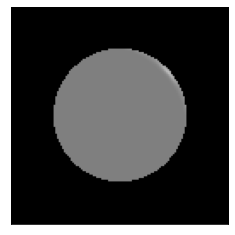

In [20]:
plt.imshow(sphere_image.squeeze())
plt.xticks([])
plt.yticks([])
plt.grid(False)

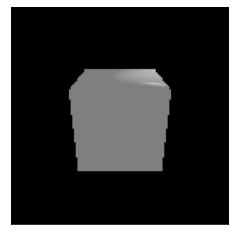

In [21]:
plt.imshow(cube_image.squeeze())
plt.xticks([])
plt.yticks([])
plt.grid(False)